# COVID-19 Vaccinations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#### Gather data from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

#### See codebook here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [6]:
df_world = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=['date']).set_index(['location', 'date']).sort_index()
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-20      ZWE    Africa      36662.0       10.0   
            2021-03-21      ZWE    Africa      36665.0        3.0   
            2021-03-22      ZWE    Africa      36684.0       19.0   
            2021-03-23      ZWE    Africa      36717.0       33.0   
            2021-03-24      ZWE    Africa      36749.0       32.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-20              27.286        1510.0         0.0   
            2021-03-21              25.857        1512.0         2.0   
            2021-03-22              25.714        1514.0         2.0   
            2021-03-23              26.000        1516.0         2.0   
            2021-03-24              28.143        1516.0         0.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-20                1.286                 2466.674   
            2021-03-21                1.286                 2466.876   
            2021-03-22                1.429                 2468.154   
            2021-03-23                1.286                 2470.375   
            2021-03-24                1.143                 2472.528   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.026  ...        1803.987   
            2020-02-25                  0.000  ...        1803.987   
            2020-02-26                  0.000  ...        1803.987   
            2020-02-27                  0.000  ...        1803.987   
            2020-02-28                  0.000  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-20                  0.673  ...        1899.775   
            2021-03-21                  0.202  ...        1899.775   
            2021-03-22                  1.278  ...        1899.775   
            2021-03-23                  2.220  ...        1899.775   
            2021-03-24                  2.153  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
          

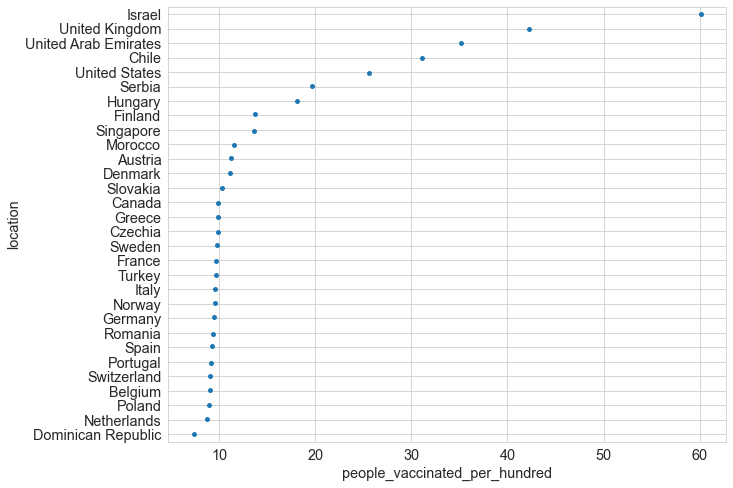

In [7]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(30, 'people_vaccinated_per_hundred')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='people_vaccinated_per_hundred', color='C0', size=5)
ax.yaxis.grid()

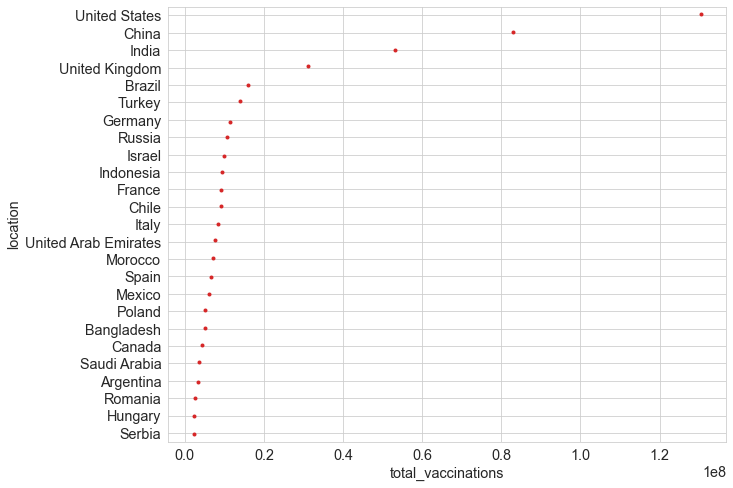

In [8]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(25, 'total_vaccinations')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='total_vaccinations', color='C3', size=4)
ax.yaxis.grid()

In [9]:
countries_with_vacc_data = df_world.sort_index().reset_index().groupby('location').last()['people_vaccinated_per_hundred'].dropna().index.to_list()
countries_with_vacc_data

['Afghanistan',
 'Africa',
 'Albania',
 'Andorra',
 'Angola',
 'Anguilla',
 'Argentina',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Chile',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Ma

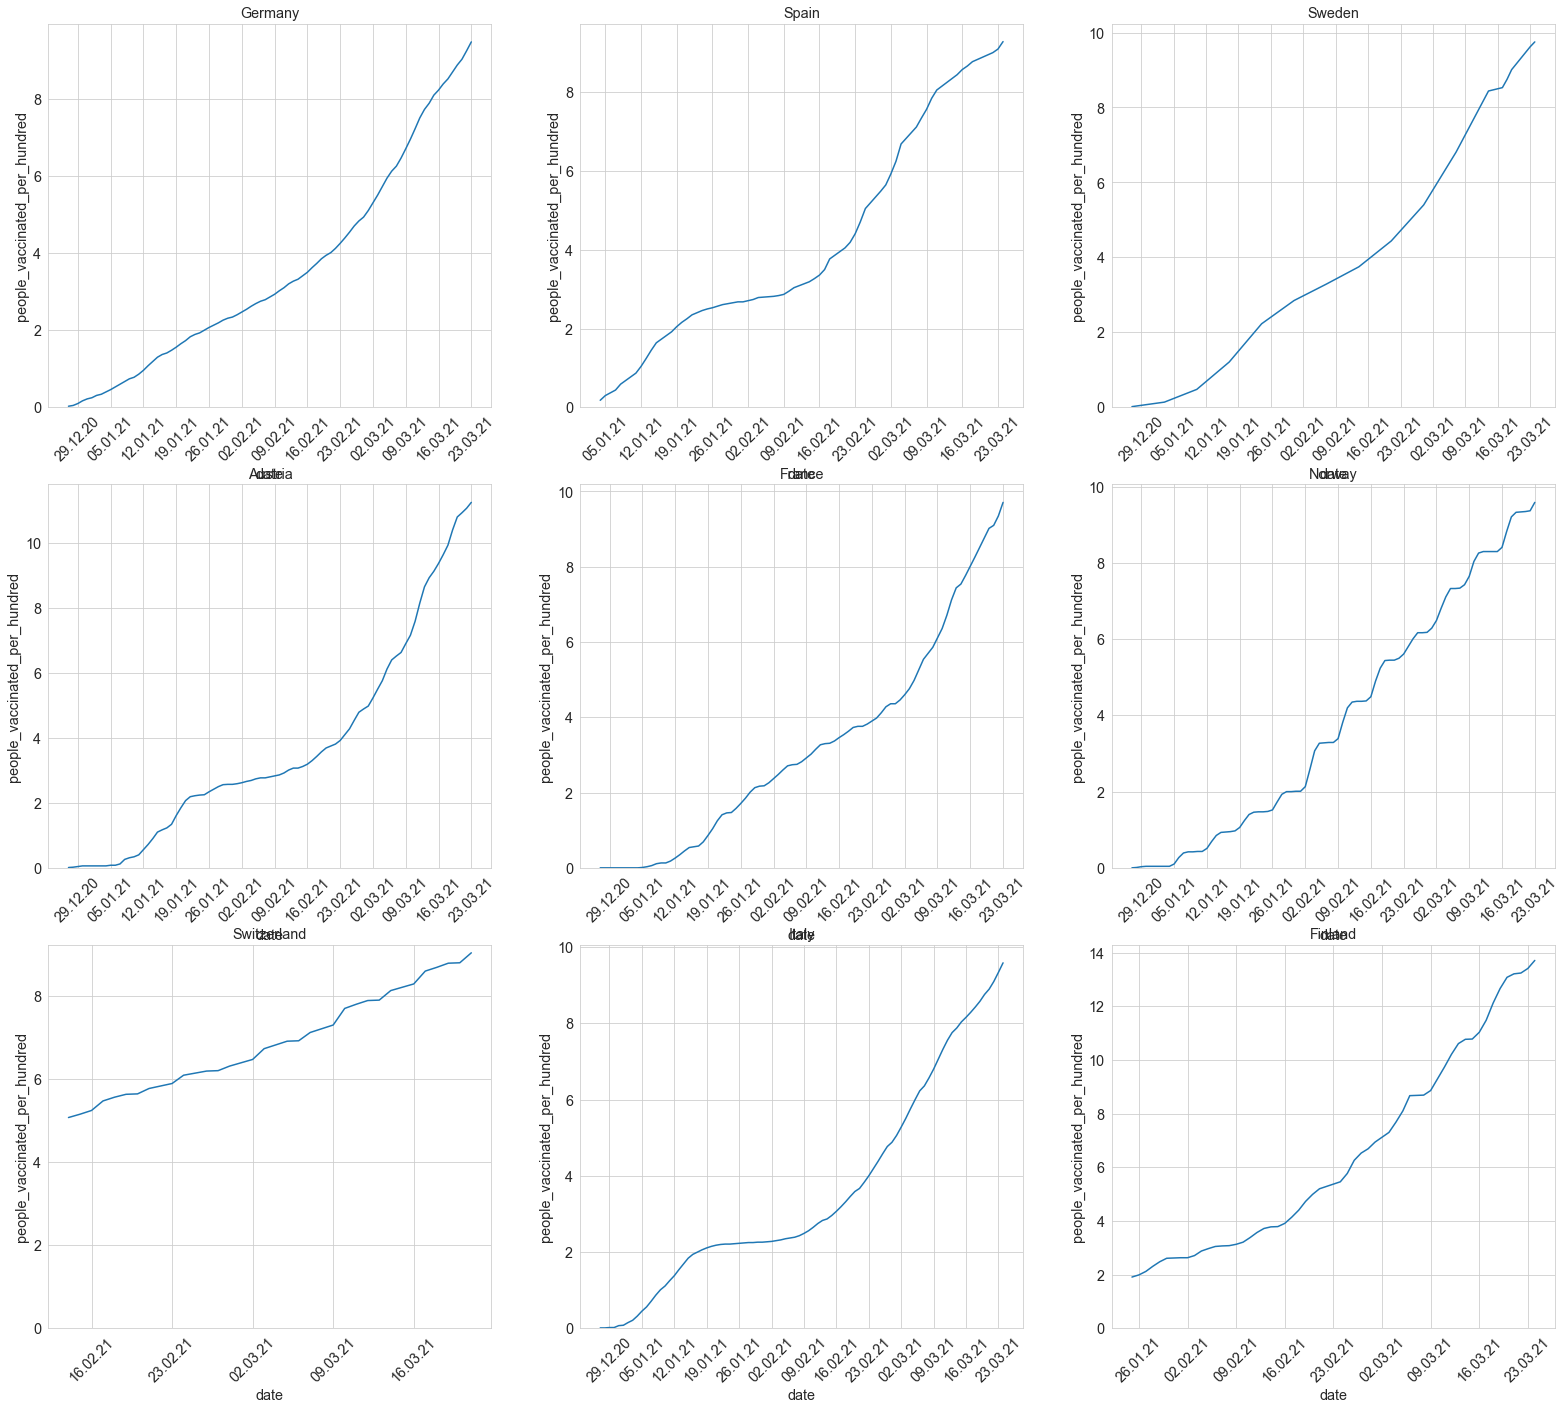

In [10]:
cols, rows = 3,3
countries = np.random.choice(df_world.loc[countries_with_vacc_data].index.get_level_values(0).drop_duplicates().to_list(), cols*rows)
countries = ['Germany', 'Spain', 'Sweden', 'Austria', 'France', 'Norway', 'Switzerland', 'Italy', 'Finland']

fig, ax = plt.subplots(rows, cols , figsize=(cols*9,rows*7 +3))
for i, country in enumerate(countries, 1):
    plt.subplot(rows, cols, i)
    ax = sns.lineplot(data = df_world.loc[country], x=df_world.loc[country].index, y='people_vaccinated_per_hundred')
    ax.set_title(country)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylim(ymin=0)


In [21]:
cols, rows = 2, 4
rows

4

In [20]:
df_world.loc['Germany'].index

DatetimeIndex(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05',
               ...
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22'],
              dtype='datetime64[ns]', name='date', length=421, freq=None)

In [55]:
df_world['days'] = df_world.groupby(level=[0,1]).filter(lambda x:x.people_vaccinated_per_hundred > 5).groupby(level=[0]).cumcount() + 1

In [45]:
df_world['days']

location     date      
Afghanistan  2020-02-24   NaN
             2020-02-25   NaN
             2020-02-26   NaN
             2020-02-27   NaN
             2020-02-28   NaN
                           ..
Zimbabwe     2021-03-19   NaN
             2021-03-20   NaN
             2021-03-21   NaN
             2021-03-22   NaN
             2021-03-23   NaN
Name: days, Length: 76832, dtype: float64

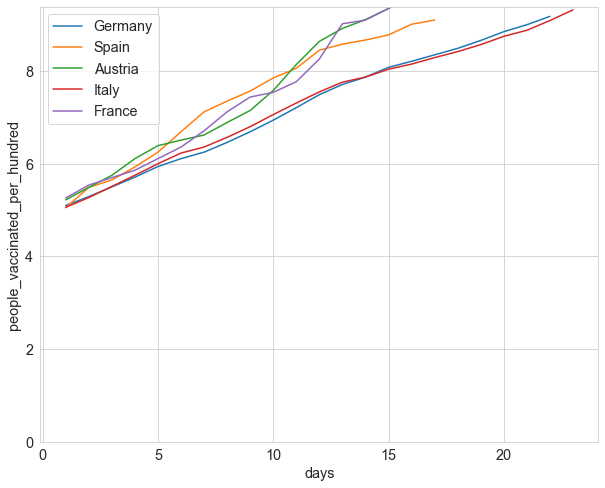

In [57]:
cols, rows = 3,3
countries = np.random.choice(df_world.loc[countries_with_vacc_data].index.get_level_values(0).drop_duplicates().to_list(), cols*rows)
countries = ['Germany', 'Spain',  'Austria', 'Italy', 'France']

fig, ax = plt.subplots(1, 1 , figsize=(10,8))
for i, country in enumerate(countries, 1):
    df_plot = df_world.loc[country]
    df_plot = df_plot[df_plot.days>=1]
    ax = sns.lineplot(data = df_plot, x='days', y='people_vaccinated_per_hundred', label=country)
    ax.set_ylim(ymin=0)
    ax.legend()


In [46]:
df_world.loc['Germany'][['days', 'people_vaccinated_per_hundred']]

,days,people_vaccinated_per_hundred
date,,
2020-01-27,NaN,NaN
2020-01-28,NaN,NaN
2020-01-29,NaN,NaN
2020-01-30,NaN,NaN
2020-01-31,NaN,NaN
...,...,...
2021-03-19,53.0,8.66
2021-03-20,54.0,8.85
2021-03-21,55.0,9.00
